<a href="https://colab.research.google.com/github/ShreejaSharma/didactic-potato/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from pandas import read_csv


In [ ]:
data1 = read_csv('ElectricityTheft.csv',sep = ',')

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [ ]:
data1.fillna(0, inplace = True)
le = LabelEncoder()

#Converting non-numeric data to numeric
data1['client_id'] = pd.Series(le.fit_transform(data1['client_id'].astype(str)))

#Converting an object into int variable
data1['label'] = data1['label'].astype('uint8')

#drop irrelevent columns
data1.drop(['creation_date'], axis = 1,inplace=True)

In [ ]:
sizes = data1['label'].value_counts(sort=1)
print(sizes)

0    10000
1     7566
Name: label, dtype: int64


In [ ]:
#Define dependent variable
y = data1['label'].values

In [ ]:
#Define independent variables
x = data1.drop(labels=['label'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.25, random_state=20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=4,activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])
model.summary()
    

    
#y_pred = classifier.predict(x_test)
#y_pred = (y_pred > 0.5)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_train_scaled, y_train, validation_split=0.2, epochs = 200,batch_size=15)

Epoch 1/200
703/703 [==============================] - 2s 2ms/step - loss: 0.0869 - mae: 0.1980 - val_loss: 0.0513 - val_mae: 0.1333
Epoch 2/200
703/703 [==============================] - 1s 2ms/step - loss: 0.0477 - mae: 0.1175 - val_loss: 0.0440 - val_mae: 0.0919
Epoch 3/200
703/703 [==============================] - 1s 1ms/step - loss: 0.0413 - mae: 0.1007 - val_loss: 0.0402 - val_mae: 0.0813
Epoch 4/200
703/703 [==============================] - 1s 2ms/step - loss: 0.0418 - mae: 0.0968 - val_loss: 0.0390 - val_mae: 0.0923
Epoch 5/200
703/703 [==============================] - 1s 1ms/step - loss: 0.0404 - mae: 0.0925 - val_loss: 0.0378 - val_mae: 0.0933
Epoch 6/200
703/703 [==============================] - 1s 1ms/step - loss: 0.0368 - mae: 0.0862 - val_loss: 0.0375 - val_mae: 0.1007
Epoch 7/200
703/703 [==============================] - 1s 1ms/step - loss: 0.0352 - mae: 0.0826 - val_loss: 0.0383 - val_mae: 0.1038
Epoch 8/200
703/703 [==============================] - 1s 1ms/step - 

In [ ]:
from matplotlib import pyplot as plt

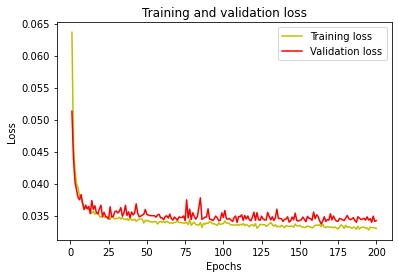

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

A plot of learning curves shows a good fit if:

The plot of training loss decreases to a point of stability.
The plot of validation loss decreases to a point of stability and has a small gap with the training loss.

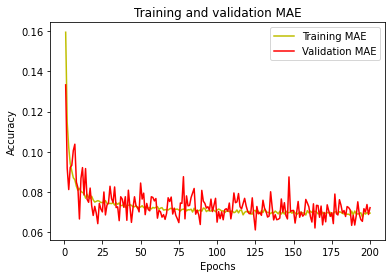

In [ ]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs,acc,'y',label='Training MAE')
plt.plot(epochs,val_acc,'r',label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:

predictions = model.predict(x_test_scaled[:5])
print("Predicted values are: ",predictions)
print("Real values are : ",y_test[:5])


Predicted values are:  [[1.0209916 ]
 [0.06621597]
 [1.0209916 ]
 [1.0209916 ]
 [0.05128152]]
Real values are :  [1 0 1 1 0]


In [ ]:
results = model.evaluate(x_test_scaled,y_test)

print('Mean squared error from neural net : ',results[0])
print('Mean absolute error from neural net : ',results[1])

138/138 [==============================] - 0s 984us/step - loss: 0.0356 - mae: 0.0738
Mean squared error from neural net :  0.0355878546833992
Mean absolute error from neural net :  0.07375849783420563


In [ ]:

pred = model.predict(x_test_scaled)


In [ ]:
print(pred[:5])

[[1.0209916 ]
 [0.06621597]
 [1.0209916 ]
 [1.0209916 ]
 [0.05128152]]


In [ ]:
pred = (pred > 0.5)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve
acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9615 	precision:0.9801 	recall:0.9279 	F1-score:0.9533


In [ ]:

y_test = pd.DataFrame(y_test) 

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, pred.round())

In [ ]:
print(cnf_matrix)

[[2498   35]
 [ 134 1725]]


In [ ]:
from sklearn.metrics import plot_confusion_matrix

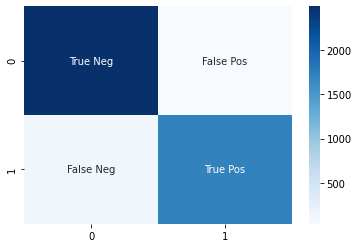

In [ ]:
import numpy as np
import seaborn as sns
cf_matrix = confusion_matrix(y_test, pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)



sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')